# Failed Simulations Analysis

This notebook analyzes the parameters that lead to failed ODE simulations. We'll visualize the distribution of parameter values for failed vs successful simulations to identify patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
import os
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Load Data

In [2]:
n_samples = 2048

params_filename = 'parameters_naghavi_constrained_fixed_T_v_tot'

sim_dir = f'outputs/simulations/output_{n_samples}_samples_{params_filename}/'

# Load the input samples
df = pd.read_csv(os.path.join(sim_dir, f'input_samples_{n_samples}.csv'))

df.var()

ao.r          1409.021332
ao.c             0.001876
art.r        26380.068393
art.c            0.187592
ven.r            1.688324
ven.c          267.565856
av.r             0.750366
mv.r             0.350379
la.E_pas         0.001876
la.E_act         0.006305
la.v_ref         1.688324
la.k_pas         0.000284
lv.E_pas         0.020844
lv.E_act         0.187592
lv.v_ref         2.084351
lv.k_pas         0.000102
ao.l             0.000000
ao.v_ref         0.000000
art.l            0.000000
art.v_ref        0.000000
ven.l            0.000000
ven.v_ref        0.000000
la.v             0.000000
la.delay         0.000000
la.t_tr          0.000000
la.tau           0.000000
la.t_max         0.000000
lv.delay         0.000000
lv.t_tr          0.000000
lv.tau           0.000000
lv.t_max         0.000000
T                0.000000
ao.v             7.209310
art.v          702.089134
ven.v          778.169426
dtype: float64

In [3]:
# Get only those columns where the variance is not zero
# non_zero_variance_cols = df.var()[df.var() > 0].index
# df = df[non_zero_variance_cols]

print(f"Total samples: {len(df)}")
print(f"Number of parameters: {len(df.columns)}")
print(f"Parameters: {list(df.columns)}")

# Load failed simulation indices
with open(os.path.join(sim_dir, 'bool_indices.json'), 'r') as f:
    failed_indices = json.load(f)

print(f"\nNumber of failed simulations: {len(failed_indices)}")
print(f"Failure rate: {len(failed_indices)/len(df)*100:.2f}%")
print(f"Failed indices: {failed_indices}")

Total samples: 2048
Number of parameters: 35
Parameters: ['ao.r', 'ao.c', 'art.r', 'art.c', 'ven.r', 'ven.c', 'av.r', 'mv.r', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'lv.E_pas', 'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'ao.l', 'ao.v_ref', 'art.l', 'art.v_ref', 'ven.l', 'ven.v_ref', 'la.v', 'la.delay', 'la.t_tr', 'la.tau', 'la.t_max', 'lv.delay', 'lv.t_tr', 'lv.tau', 'lv.t_max', 'T', 'ao.v', 'art.v', 'ven.v']

Number of failed simulations: 0
Failure rate: 0.00%
Failed indices: []


## Create Success/Failure Labels

In [4]:
# Create a binary column for failed simulations
df['failed'] = False
df.loc[failed_indices, 'failed'] = True

# Separate successful and failed simulations
failed_df = df[df['failed'] == True].copy()
success_df = df[df['failed'] == False].copy()

print(f"Successful simulations: {len(success_df)}")
print(f"Failed simulations: {len(failed_df)}")

# Get parameter columns (exclude the 'failed' column)
param_cols = [col for col in df.columns if col != 'failed']
print(f"\nParameter columns ({len(param_cols)}): {param_cols}")

Successful simulations: 2048
Failed simulations: 0

Parameter columns (35): ['ao.r', 'ao.c', 'art.r', 'art.c', 'ven.r', 'ven.c', 'av.r', 'mv.r', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'lv.E_pas', 'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'ao.l', 'ao.v_ref', 'art.l', 'art.v_ref', 'ven.l', 'ven.v_ref', 'la.v', 'la.delay', 'la.t_tr', 'la.tau', 'la.t_max', 'lv.delay', 'lv.t_tr', 'lv.tau', 'lv.t_max', 'T', 'ao.v', 'art.v', 'ven.v']


## 1. Distribution Comparison for All Parameters

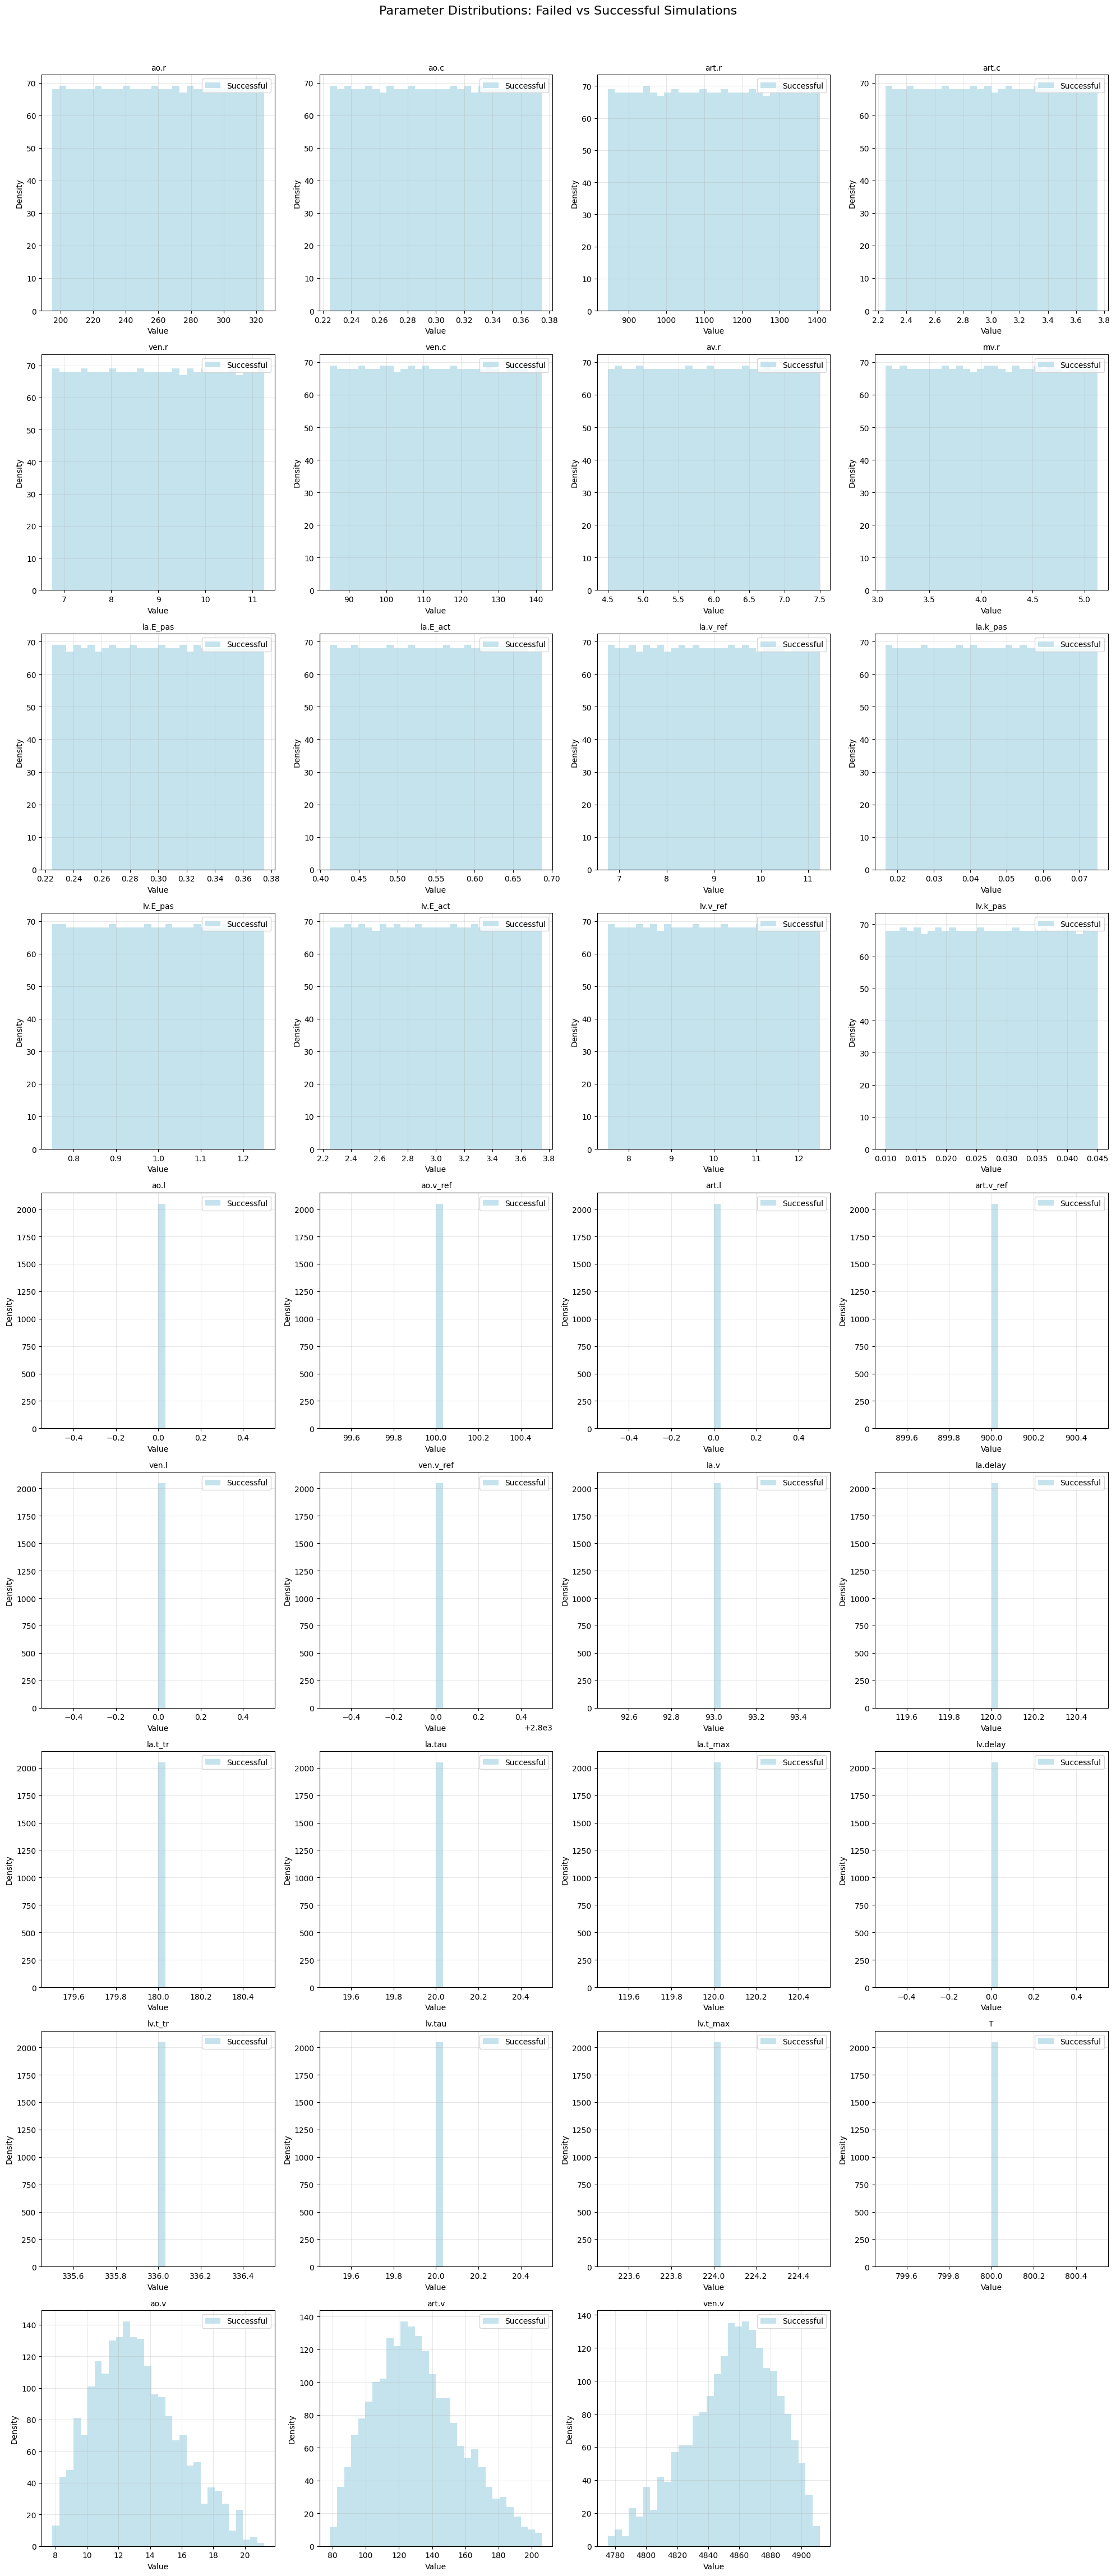

In [6]:
# Create subplots for all parameters
n_params = len(param_cols)
n_cols = 4
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, param in enumerate(param_cols):
    ax = axes[i]
    
    # Plot histograms
    ax.hist(success_df[param], bins=30, alpha=0.7, label='Successful', color='lightblue', density=False)
    #ax.hist(failed_df[param], bins=30, alpha=0.7, label='Failed', color='red', density=False,)
    # we want this to be a line
    # ax.axvline(failed_df[param].iloc[0], color='blue', linestyle='dashed', linewidth=1, label='Failed')
    # ax.axvline(failed_df[param].iloc[1], color='green', linestyle='dashed', linewidth=1, label='Failed')
    # ax.axvline(failed_df[param].iloc[2], color='red', linestyle='dashed', linewidth=1, label='Failed')        
    ax.set_title(f'{param}', fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for i in range(n_params, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Parameter Distributions: Failed vs Successful Simulations', fontsize=16, y=1.02)
plt.show()

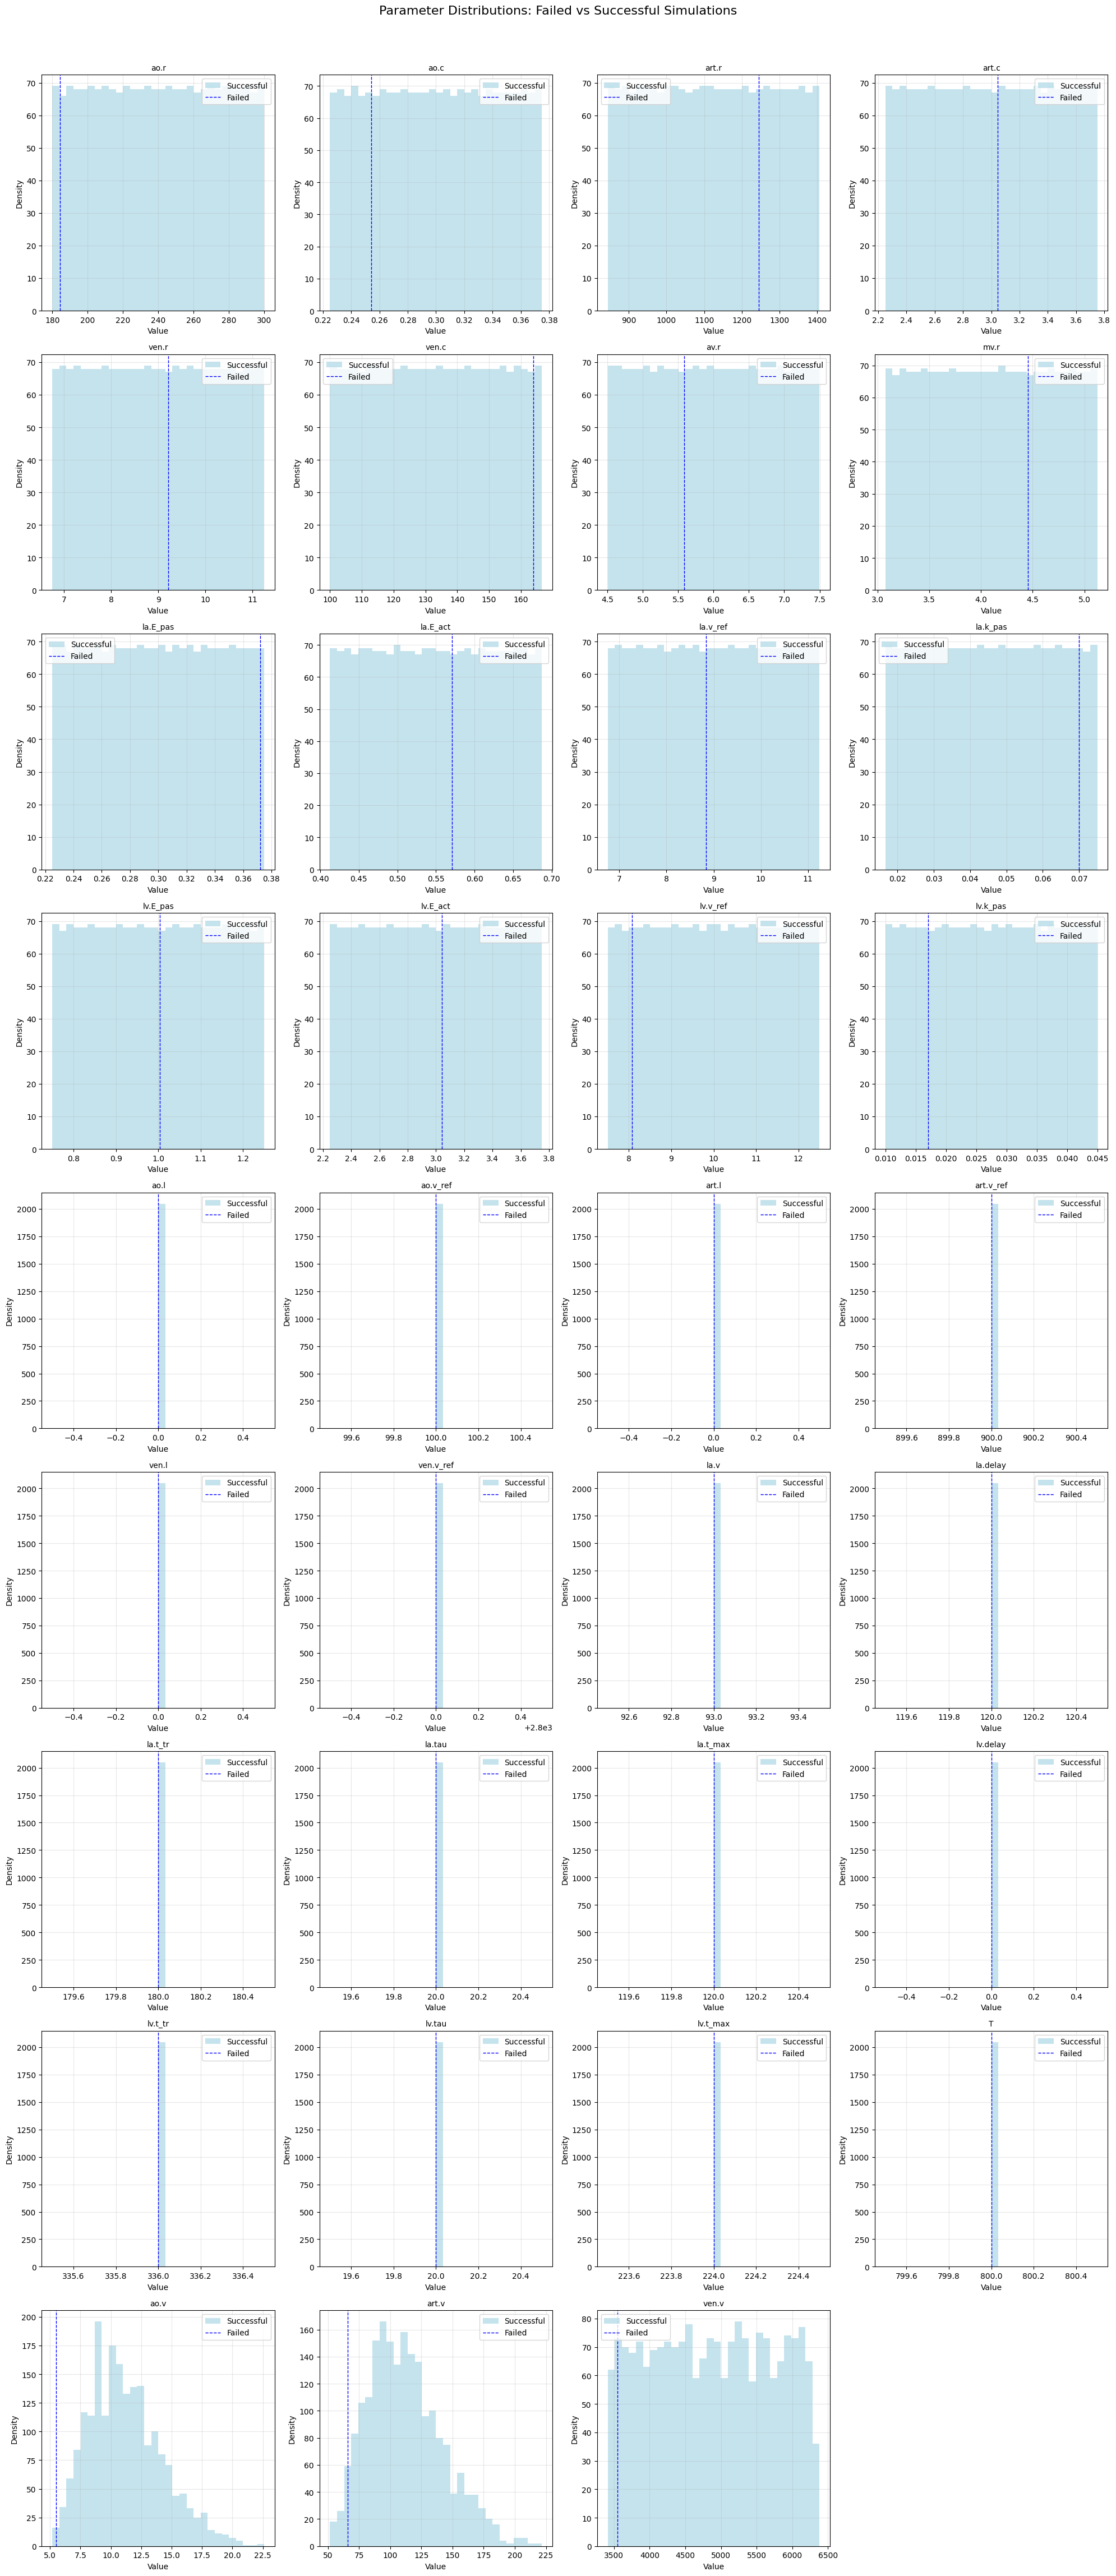

In [ ]:
# Create subplots for all parameters
n_params = len(param_cols)
n_cols = 4
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, param in enumerate(param_cols):
    ax = axes[i]
    
    # Plot histograms
    ax.hist(success_df[param], bins=30, alpha=0.7, label='Successful', color='lightblue', density=False)
    #ax.hist(failed_df[param], bins=30, alpha=0.7, label='Failed', color='red', density=False,)
    # we want this to be a line
    ax.axvline(failed_df[param].iloc[0], color='blue', linestyle='dashed', linewidth=1, label='Failed')
    # ax.axvline(failed_df[param].iloc[1], color='green', linestyle='dashed', linewidth=1, label='Failed')
    # ax.axvline(failed_df[param].iloc[2], color='red', linestyle='dashed', linewidth=1, label='Failed')        
    ax.set_title(f'{param}', fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for i in range(n_params, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Parameter Distributions: Failed vs Successful Simulations', fontsize=16, y=1.02)
plt.show()

## 2. Statistical Summary of Differences

In [87]:
# Calculate statistics for each parameter
stats_summary = []

for param in param_cols:
    success_values = success_df[param]
    failed_values = failed_df[param]
    
    # Perform t-test
    from scipy.stats import ttest_ind, mannwhitneyu
    
    try:
        t_stat, p_value = ttest_ind(success_values, failed_values)
        u_stat, p_value_mw = mannwhitneyu(success_values, failed_values, alternative='two-sided')
    except:
        t_stat, p_value = np.nan, np.nan
        u_stat, p_value_mw = np.nan, np.nan
    
    stats_summary.append({
        'Parameter': param,
        'Success_Mean': success_values.mean(),
        'Success_Std': success_values.std(),
        'Failed_Mean': failed_values.mean(),
        'Failed_Std': failed_values.std(),
        'Mean_Difference': failed_values.mean() - success_values.mean(),
        'T_Test_P_Value': p_value,
        'MW_Test_P_Value': p_value_mw
    })

stats_df = pd.DataFrame(stats_summary)
stats_df['Significant'] = stats_df['T_Test_P_Value'] < 0.05

# Sort by absolute mean difference
stats_df['Abs_Mean_Diff'] = abs(stats_df['Mean_Difference'])
stats_df = stats_df.sort_values('Abs_Mean_Diff', ascending=False)

print("Statistical Summary (sorted by absolute mean difference):")
print(stats_df[['Parameter', 'Success_Mean', 'Failed_Mean', 'Mean_Difference', 'T_Test_P_Value', 'Significant']].round(4))

Statistical Summary (sorted by absolute mean difference):
    Parameter  Success_Mean  Failed_Mean  Mean_Difference  T_Test_P_Value  \
34      ven.v     4851.9563    3497.6892       -1354.2671          0.0053   
2       art.r     1124.9573    1590.8239         465.8665          0.0130   
0        ao.r      239.9962     281.6515          41.6553          0.2977   
33      art.v      134.6747     115.6699         -19.0048          0.4729   
5       ven.c      108.2696     112.8946           4.6250          0.2488   
10   la.v_ref        9.9997      13.2098           3.2101          0.0541   
32       ao.v       13.4950      11.0921          -2.4029          0.3730   
4       ven.r        8.9998      11.3680           2.3682          0.1144   
14   lv.v_ref       10.0001       8.5128          -1.4874          0.3722   
3       art.c        2.9999       3.7090           0.7091          0.1562   
13   lv.E_act        3.0000       2.5528          -0.4473          0.3711   
6        av.r     

## 3. Box Plots for Top Discriminating Parameters

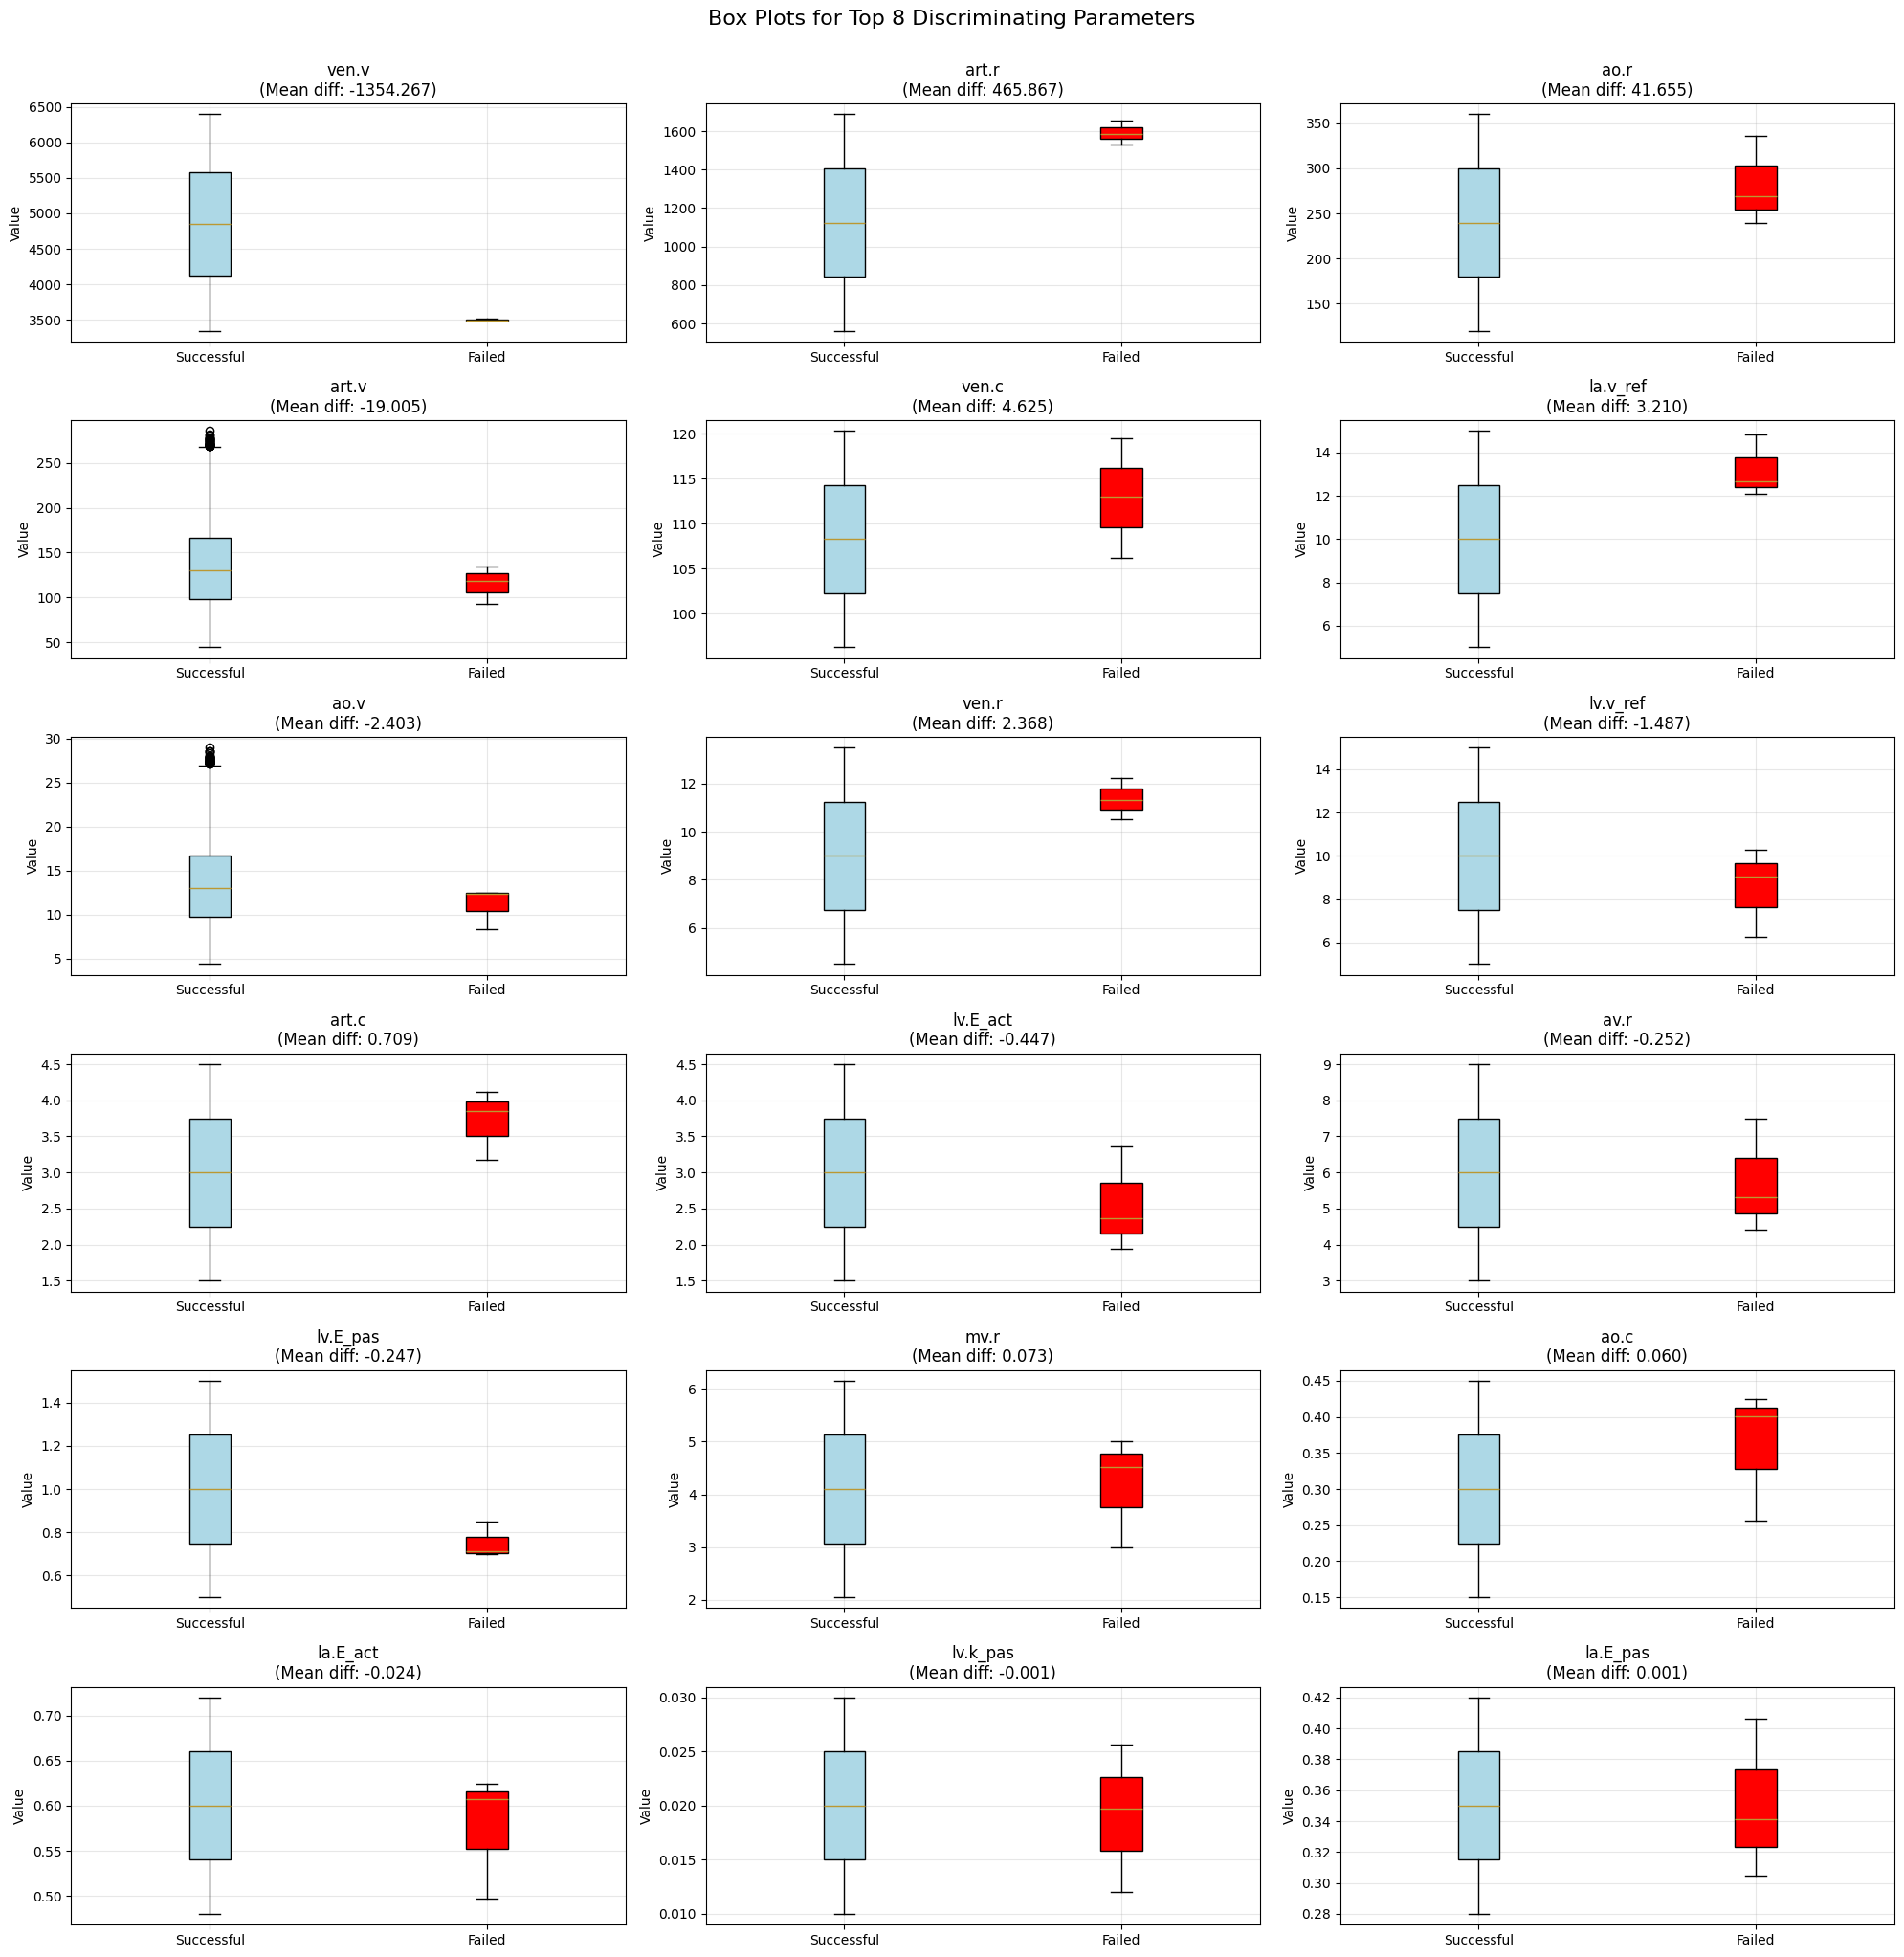

In [88]:
# Select top 8 parameters with largest differences
top_params = stats_df.head(18)['Parameter'].values

fig, axes = plt.subplots(6, 3, figsize=(20, 20))
axes = axes.flatten()

for i, param in enumerate(top_params):
    ax = axes[i]
    
    # Prepare data for box plot
    data_to_plot = [success_df[param], failed_df[param]]
    
    box_plot = ax.boxplot(data_to_plot, labels=['Successful', 'Failed'], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][1].set_facecolor('red')
    
    ax.set_title(f'{param}\n(Mean diff: {stats_df[stats_df["Parameter"]==param]["Mean_Difference"].iloc[0]:.3f})')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Box Plots for Top 8 Discriminating Parameters', fontsize=16, y=1.02)
plt.show()